<a href="https://colab.research.google.com/github/Somcodo4/rul-prediction-of-lithium-ion-batteries/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import time

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load dataset from CSV file
df=pd.read_csv('Battery_RUL_II cleaned 2.csv')

In [5]:
# Step 1: Load the dataset
data = pd.read_csv('Battery_RUL_II cleaned 2.csv')  # Replace 'your_dataset.csv' with the actual file name

In [6]:
# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(data.head())

   Cycle_Index  Discharge_Time    Decrement  Max_Voltage_Discharge  \
0            1         2595.30  1151.488500                  3.670   
1            2         7408.64  1172.512500                  4.246   
2            3         7393.76  1112.992000                  4.249   
3            4         7385.50  1080.320667                  4.250   
4            7         3301.18  1194.235077                  3.674   

   Min_Voltage_Charge         Time  Time_constant_current  Charging_time   RUL  
0               3.211  5460.001000                6755.01       10777.82  1112  
1               3.220  5508.992000                6762.02       10500.35  1111  
2               3.224  5508.993000                6762.02       10420.38  1110  
3               3.225  5502.016000                6762.02       10322.81  1109  
4               3.504  5023.633636                5977.38        5977.38  1106  


In [7]:
df.head()

,Cycle_Index,Discharge_Time,Decrement,Max_Voltage_Discharge,Min_Voltage_Charge,Time,Time_constant_current,Charging_time,RUL
0,1,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,2,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,3,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,4,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,7,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106


In [8]:
df.tail()

,Cycle_Index,Discharge_Time,Decrement,Max_Voltage_Discharge,Min_Voltage_Charge,Time,Time_constant_current,Charging_time,RUL
14840,1107,773.00,180.480000,3.774,3.742,922.712,1412.31,6659.62,5
14841,1108,770.44,179.523809,3.773,3.742,922.775,1412.38,6678.88,4
14842,1109,771.12,179.523809,3.773,3.744,915.512,1412.31,6670.38,3
14843,1110,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
14844,1111,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


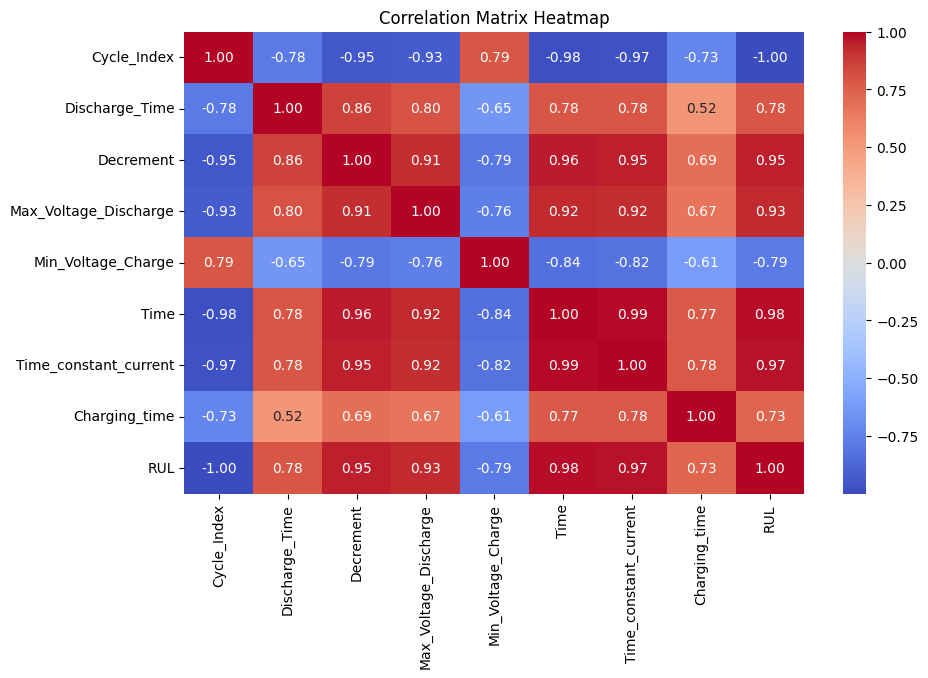

In [9]:
# Calculate Correlation Matrix
correlation_matrix = df.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
# Split features (X) and target variable (y)
X = df.drop(columns=['RUL'])
y = df['RUL']

In [11]:
# Step 3: Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [12]:
# Scale the features and target
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # Reshape y to a 2D array for scaling

In [13]:
# Step 4: Train the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_scaled, y_scaled)

SVR(C=100)

In [14]:
# Step 5: Make predictions and evaluate the model
y_pred_scaled = svr_model.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Inverse transform the predictions

In [15]:
# Step 6: Evaluate the model
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [16]:
print(f"Support Vector Regression Metrics for RUL Prediction:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Support Vector Regression Metrics for RUL Prediction:
Mean Squared Error (MSE): 235.44
Root Mean Squared Error (RMSE): 15.34
Mean Absolute Error (MAE): 12.87
R-squared (R²): 1.00


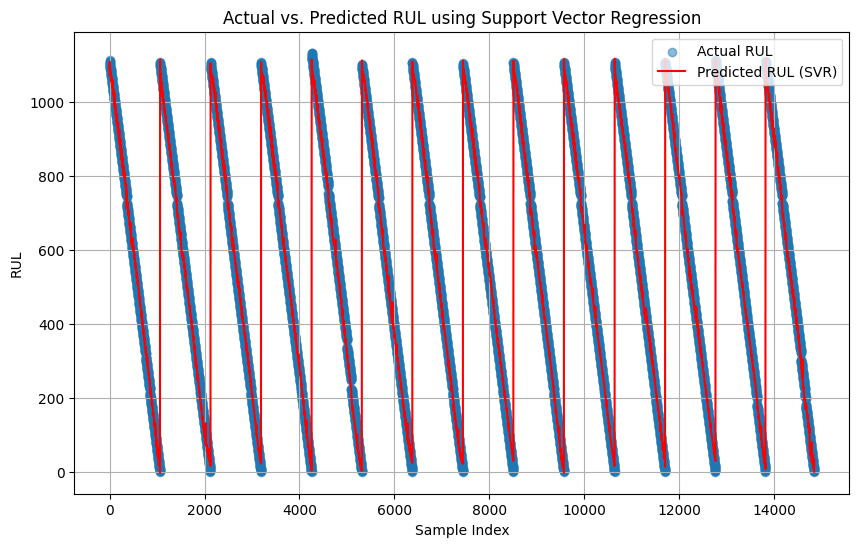

In [17]:
# Step 7: Plot the actual vs. predicted RUL
plt.figure(figsize=(10,6))
plt.scatter(range(len(y)), y, label='Actual RUL', alpha=0.5)
plt.plot(range(len(y)), y_pred, label='Predicted RUL (SVR)', color='red')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.title('Actual vs. Predicted RUL using Support Vector Regression')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Function to get user input
def get_user_input():
    Cycle_Index = float(input("Enter Cycle_Index: "))
    Discharge_Time = float(input("Enter Discharge Time: "))
    Decrement = float(input("Enter Decrement 3.6-3.4V: "))
    Max_Voltage_Discharge = float(input("Enter Max. Voltage Discharge (V): "))
    Min_Voltage_Charge = float(input("Enter Min. Voltage Charge (V): "))
    Time = float(input("Enter Time at 4.15V (s): "))
    Time_constant_current = float(input("Enter Time constant current (s): "))
    Charging_time = float(input("Enter Charging time (s): "))
    return [Cycle_Index, Discharge_Time, Decrement, Max_Voltage_Discharge, Min_Voltage_Charge, Time, Time_constant_current, Charging_time]

# Function to predict RUL using the trained SVR model
def predict_rul_svr(user_features, svr_model, scaler_X, scaler_y):
    # Convert user input into a DataFrame with the same feature names used during training
    feature_names = ['Cycle_Index', 'Discharge_Time',  'Decrement', 'Max_Voltage_Discharge', 'Min_Voltage_Charge', 'Time', 'Time_constant_current', 'Charging_time']
    user_features_df = pd.DataFrame([user_features], columns=feature_names)

    # Scale the user input features using the scaler_X
    user_features_scaled = scaler_X.transform(user_features_df)

    # Predict the scaled RUL using the SVR model
    predicted_rul_scaled = svr_model.predict(user_features_scaled)

    # Inverse transform the predicted RUL to get the original scale
    predicted_rul = scaler_y.inverse_transform(predicted_rul_scaled.reshape(-1, 1)).ravel()[0]

    return predicted_rul

# Function to map RUL to battery health categories
def map_to_battery_health(rul):
    if rul >= 741:
        return 'Excellent Battery Health'
    elif rul >= 371:
        return 'Average Battery Health'
    else:
        return 'Low or Poor Battery Health'

# Function to suggest optimization strategies based on battery health category
def suggest_optimization(category):
    if category == 'Excellent Battery Health':
        suggestions = [
            "Regular Monitoring: Continuously monitor the battery’s performance parameters.",
            "Optimal Charging Practices: Avoid overcharging and deep discharging. Use smart chargers.",
            "Temperature Management: Ensure the battery operates within the optimal temperature range.",
            "Balanced Usage: Ensure cells are balanced if the battery is part of a pack.",
            "Software Updates: Keep battery management software updated."
        ]
    elif category == 'Average Battery Health':
        suggestions = [
            "Conditioning Cycles: Perform controlled charging and discharging cycles.",
            "Reduced Load: Lower the load on the battery whenever possible.",
            "Partial Charging: Maintain the battery’s state of charge between 20% and 80%.",
            "Routine Maintenance: Regularly clean and check connections and terminals.",
            "Usage Adjustments: Adjust usage patterns to avoid high-drain scenarios."
        ]
    else:  # Low or Poor Battery Health
        suggestions = [
            "Capacity Testing: Regularly test the battery’s capacity.",
            "Load Reduction: Significantly reduce the load to prevent sudden failures.",
            "Refurbishment: Consider battery refurbishment options.",
            "Preemptive Replacement: Replace the battery to avoid unexpected failures.",
            "Recycling: Ensure proper recycling procedures for disposed batteries."
        ]
    return suggestions

# Example: Assuming 'svr_model' is your trained SVR model
# and 'scaler_X' and 'scaler_y' are your fitted scalers

# Get user input for features
user_features = get_user_input()

# Predict RUL based on user input using the SVR model
predicted_rul = predict_rul_svr(user_features, svr_model, scaler_X, scaler_y)

# Map the predicted RUL to a battery health category
predicted_health_category = map_to_battery_health(predicted_rul)

# Suggest optimization strategies based on the battery health category
optimization_suggestions = suggest_optimization(predicted_health_category)

# Display the results
print("\nThe Predicted Remaining Useful Life (RUL) of your battery is", predicted_rul)
print("This estimate is a rough approximation and actual RUL can vary based on factors such as  usage patterns, temperature, and charging habits.")
print("The battery health category is:", predicted_health_category)
print("Optimization Strategies:")
for suggestion in optimization_suggestions:
    print(f"- {suggestion}")

Enter Cycle_Index: 670
Enter Discharge Time: 1470
Enter Decrement 3.6-3.4V: 426
Enter Max. Voltage Discharge (V): 3.8
Enter Min. Voltage Charge (V): 3.5
Enter Time at 4.15V (s): 2660
Enter Time constant current (s): 3500
Enter Charging time (s): 8100

The Predicted Remaining Useful Life (RUL) of your battery is 447.21638827810665
This estimate is a rough approximation and actual RUL can vary based on factors such as  usage patterns, temperature, and charging habits.
The battery health category is: Average Battery Health
Optimization Strategies:
- Conditioning Cycles: Perform controlled charging and discharging cycles.
- Reduced Load: Lower the load on the battery whenever possible.
- Partial Charging: Maintain the battery’s state of charge between 20% and 80%.
- Routine Maintenance: Regularly clean and check connections and terminals.
- Usage Adjustments: Adjust usage patterns to avoid high-drain scenarios.
